# SETUP

In [ ]:
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Ross Datathon Competition/data'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
sys.path.append(GOOGLE_DRIVE_PATH)

print(os.listdir(GOOGLE_DRIVE_PATH))

['1a. Airports.csv', '1b. Airlines.csv', '1c. Service_Class.csv', '2. US_Airlines_StockPrice_2016_2021.csv', '3. Crude_Oil_Price_2016_2021.csv', '4. Flight_Delay_2016_2021.csv', '4a. Metadata_Flight_Delay_2016_2021.csv', '5. Air_Traffic_2021.csv', '5a. Metadata_Air_Traffic_2021.csv', '6-1. WeatherEvents_2016.csv', '6-2. WeatherEvents_2017.csv', '6-3. WeatherEvents_2018.csv', '6-4. WeatherEvents_2019.csv', '6-5. WeatherEvents_2020.csv', '6-6. WeatherEvents_2021.csv', '7. Flight_Traffic_2017.csv', '8. Weather_Summary_2017.csv']


In [ ]:
!pip install brokenaxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 

import os
import bz2
import pandas as pd
import re 
import numpy as np
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from textblob import TextBlob
import string
import time
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes

# Load Data

In [ ]:
stock_price_2016_2021 = pd.read_csv(GOOGLE_DRIVE_PATH + '/2. US_Airlines_StockPrice_2016_2021.csv')
oil_price_2016_2021 = pd.read_csv(GOOGLE_DRIVE_PATH + '/3. Crude_Oil_Price_2016_2021.csv')
flight_delay_2016_2021 = pd.read_csv(GOOGLE_DRIVE_PATH + '/4. Flight_Delay_2016_2021.csv')
air_traffic_2021 = pd.read_csv(GOOGLE_DRIVE_PATH + '/5. Air_Traffic_2021.csv')
flight_traffic_2017 = pd.read_csv(GOOGLE_DRIVE_PATH + '/7. Flight_Traffic_2017.csv')
weather_summary_2017 = pd.read_csv(GOOGLE_DRIVE_PATH + '/8. Weather_Summary_2017.csv')


In [ ]:
stock_price_2016_2021.head()

,Airline,Date,Open,High,Low,Close,Adj Close,Volume
0,AAL,1/4/2016,41.290001,41.349998,40.299999,40.910000,39.095459,12037200
1,AAL,1/5/2016,41.180000,41.490002,39.950001,40.520000,38.722759,10514200
2,AAL,1/6/2016,40.049999,41.700001,40.000000,41.230000,39.401264,12393800
3,AAL,1/7/2016,40.970001,41.520000,39.680000,40.450001,38.655865,11312900
4,AAL,1/8/2016,40.939999,41.360001,40.259998,40.369999,38.579414,8853100


In [ ]:
oil_price_2016_2021.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,30-Dec-21,79.25,79.62,78.66,79.32,79.32,476
1,29-Dec-21,79,80.16,78.14,79.23,79.23,"7,057"
2,28-Dec-21,78.87,79.85,78.47,78.94,78.94,"8,523"
3,27-Dec-21,76.3,79.06,75.76,78.6,78.6,"15,723"
4,23-Dec-21,75.67,76.98,74.79,76.85,76.85,"27,624"


In [ ]:
flight_delay_2016_2021.head(3).T

,0,1,2
year,2021,2021,2021
month,12,12,12
carrier,9E,9E,9E
carrier_name,Endeavor Air Inc.,Endeavor Air Inc.,Endeavor Air Inc.
airport,ABE,ABY,AEX
airport_name,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...","Albany, GA: Southwest Georgia Regional","Alexandria, LA: Alexandria International"
arr_flights,127.0,73.0,62.0
arr_del15,9.0,11.0,8.0
carrier_ct,2.51,5.02,2.63
weather_ct,0.0,0.0,0.0


In [ ]:
air_traffic_2021.head(3).T

,0,1,2
PASSENGERS,0,0,0
FREIGHT,74974,1727598,75281
MAIL,0,0,0
DISTANCE,948,569,1319
UNIQUE_CARRIER,KAQ,KAQ,KAQ
ORIGIN,CVG,CVG,CVG
ORIGIN_CITY_NAME,"Cincinnati, OH","Cincinnati, OH","Cincinnati, OH"
ORIGIN_STATE_ABR,KY,KY,KY
ORIGIN_STATE_NM,Kentucky,Kentucky,Kentucky
DEST,MIA,EWR,ELP


In [ ]:
flight_traffic_2017.head(3).T

,0,1,2
year,2017,2017,2017
month,1,1,1
day,31,12,14
airline_id,AA,AA,AA
origin_airport,CLT,FLL,FLL
destination_airport,PHX,CLT,CLT
scheduled_departure,1619,1305,1305
actual_departure,1615.0,1256.0,1314.0
taxi_out,18.0,24.0,11.0
wheels_off,1633.0,1320.0,1325.0


In [ ]:
weather_summary_2017.head(3).T

,0,1,2
airport_id,BUF,BUF,BUF
airport_name,"BUFFALO NIAGARA INTERNATIONAL, NY US","BUFFALO NIAGARA INTERNATIONAL, NY US","BUFFALO NIAGARA INTERNATIONAL, NY US"
latitude,42.9408,42.9408,42.9408
longitude,-78.7358,-78.7358,-78.7358
elevation,218.2,218.2,218.2
datetime,2017-01-01T00:54:00,2017-01-01T06:54:00,2017-01-01T12:54:00
temperature,3.9,0.6,-0.6
visibility,16093,16093,16093
wind_direction,220,260,250
wind_speed,7.2,6.2,5.1


# Data Cleaning

In [ ]:
flight_traffic_2017 = flight_traffic_2017.fillna(0)

# Explanatory Data Analysis (EDA)

## Delay Reason Analysis

### overall delay rate

In [ ]:
flight_traffic_2017 = flight_traffic_2017.fillna(0)
flight_traffic_2017['overall_delay_flag'] = np.where(flight_traffic_2017['airline_delay']+
                        flight_traffic_2017['weather_delay']+
                        flight_traffic_2017['air_system_delay']+
                        flight_traffic_2017['security_delay']+
                        flight_traffic_2017['aircraft_delay'] > 0,
                        1, 0
                       )

In [ ]:
flight_traffic_2017['overall_delay_flag'].value_counts()

0    465067
1    102606
Name: overall_delay_flag, dtype: int64

In [ ]:
delay_rate = flight_traffic_2017['overall_delay_flag'].value_counts()[1] / sum(flight_traffic_2017['overall_delay_flag'].value_counts())
print('overall_delay_rate:{:.2f}%'.format(delay_rate*100))

overall_delay_rate:18.07%


### delay rate of 5 reasons

In [ ]:
flight_traffic_2017['airline_delay_flag'] = np.where(flight_traffic_2017['airline_delay'] > 0,
                        1, 0
                       )
flight_traffic_2017['weather_delay_flag'] = np.where(flight_traffic_2017['weather_delay'] > 0,
                        1, 0
                       )
flight_traffic_2017['air_system_delay_flag'] = np.where(flight_traffic_2017['air_system_delay'] > 0,
                        1, 0
                       )
flight_traffic_2017['security_delay_flag'] = np.where(flight_traffic_2017['security_delay'] > 0,
                        1, 0
                       )
flight_traffic_2017['aircraft_delay_flag'] = np.where(flight_traffic_2017['aircraft_delay'] > 0,
                        1, 0
                       )

In [ ]:
flight_traffic_2017['aircraft_delay_flag'].value_counts()

0    513172
1     54501
Name: aircraft_delay_flag, dtype: int64

In [ ]:
airline_delay_rate = flight_traffic_2017['airline_delay_flag'].value_counts()[1]/sum(flight_traffic_2017['airline_delay_flag'].value_counts())
weather_delay_rate = flight_traffic_2017['weather_delay_flag'].value_counts()[1]/sum(flight_traffic_2017['weather_delay_flag'].value_counts())
air_system_delay_rate = flight_traffic_2017['air_system_delay_flag'].value_counts()[1]/sum(flight_traffic_2017['air_system_delay_flag'].value_counts())
security_delay_rate = flight_traffic_2017['security_delay_flag'].value_counts()[1]/sum(flight_traffic_2017['security_delay_flag'].value_counts())
aircraft_delay_rate = flight_traffic_2017['aircraft_delay_flag'].value_counts()[1]/sum(flight_traffic_2017['aircraft_delay_flag'].value_counts())

In [ ]:
flight_traffic_2017['aircraft_delay_flag'].value_counts()

0    513172
1     54501
Name: aircraft_delay_flag, dtype: int64

In [ ]:
print('airline_delay_rate:{:.2f}%'.format(airline_delay_rate*100))
print('weather_delay_rate:{:.2f}%'.format(weather_delay_rate*100))
print('air_system_delay_rate:{:.2f}%'.format(air_system_delay_rate*100))
print('security_delay_rate:{:.2f}%'.format(security_delay_rate*100))
print('aircraft_delay_rate:{:.2f}%'.format(aircraft_delay_rate*100))

airline_delay_rate:9.05%
weather_delay_rate:0.86%
air_system_delay_rate:9.75%
security_delay_rate:0.05%
aircraft_delay_rate:9.60%


- JetBlue

In [ ]:
JetBlue_2017 = flight_traffic_2017[flight_traffic_2017['airline_id'] == 'B6']
JetBlue_2017['airline_delay_flag'] = np.where(JetBlue_2017['airline_delay'] > 0,
                        1, 0
                       )
JetBlue_2017['weather_delay_flag'] = np.where(JetBlue_2017['weather_delay'] > 0,
                        1, 0
                       )
JetBlue_2017['air_system_delay_flag'] = np.where(JetBlue_2017['air_system_delay'] > 0,
                        1, 0
                       )
JetBlue_2017['security_delay_flag'] = np.where(JetBlue_2017['security_delay'] > 0,
                        1, 0
                       )
JetBlue_2017['aircraft_delay_flag'] = np.where(JetBlue_2017['aircraft_delay'] > 0,
                        1, 0
                       )
airline_delay_rate = JetBlue_2017['airline_delay_flag'].value_counts()[1]/sum(JetBlue_2017['airline_delay_flag'].value_counts())
weather_delay_rate = JetBlue_2017['weather_delay_flag'].value_counts()[1]/sum(JetBlue_2017['weather_delay_flag'].value_counts())
air_system_delay_rate = JetBlue_2017['air_system_delay_flag'].value_counts()[1]/sum(JetBlue_2017['air_system_delay_flag'].value_counts())
security_delay_rate = JetBlue_2017['security_delay_flag'].value_counts()[1]/sum(JetBlue_2017['security_delay_flag'].value_counts())
aircraft_delay_rate = JetBlue_2017['aircraft_delay_flag'].value_counts()[1]/sum(JetBlue_2017['aircraft_delay_flag'].value_counts())
print('airline_delay_rate:{:.2f}%'.format(airline_delay_rate*100))
print('weather_delay_rate:{:.2f}%'.format(weather_delay_rate*100))
print('air_system_delay_rate:{:.2f}%'.format(air_system_delay_rate*100))
print('security_delay_rate:{:.2f}%'.format(security_delay_rate*100))
print('aircraft_delay_rate:{:.2f}%'.format(aircraft_delay_rate*100))


airline_delay_rate:16.98%
weather_delay_rate:0.67%
air_system_delay_rate:13.70%
security_delay_rate:0.14%
aircraft_delay_rate:14.76%


<ipython-input-52-030b9e5e8778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JetBlue_2017['airline_delay_flag'] = np.where(JetBlue_2017['airline_delay'] > 0,
<ipython-input-52-030b9e5e8778>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JetBlue_2017['weather_delay_flag'] = np.where(JetBlue_2017['weather_delay'] > 0,
<ipython-input-52-030b9e5e8778>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

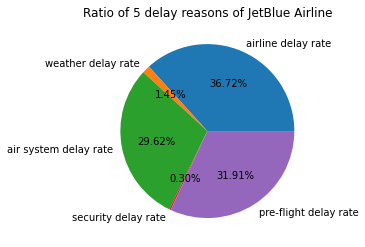

In [ ]:
y = [airline_delay_rate, weather_delay_rate, air_system_delay_rate, security_delay_rate, aircraft_delay_rate]
y = y / np.sum(y)
plt.pie(y, 
    labels=['airline delay rate','weather delay rate','air system delay rate','security delay rate', 'pre-flight delay rate'],
    autopct='%.2f%%')
plt.title("Ratio of 5 delay reasons of JetBlue Airline")
plt.show()

### delay rate by minutes

In [ ]:
result1 = pd.DataFrame()
flight_delay_2016_2021 = flight_delay_2016_2021.fillna(0)
result1['total_airline_delay_minutes'] = [sum(flight_delay_2016_2021['carrier_delay'])]
result1['total_weather_delay_minutes'] = [sum(flight_delay_2016_2021['weather_delay'])]
result1['total_air_system_delay_minutes'] = [sum(flight_delay_2016_2021['nas_delay'])]
result1['total_security_delay_minutes'] = [sum(flight_delay_2016_2021['security_delay'])]
result1['total_aircraft_delay_minutes'] = [sum(flight_delay_2016_2021['late_aircraft_delay'])]
result1['total_delay_minutes'] = result1.sum(axis=1)
rate1 = float(result1['total_airline_delay_minutes'] / result1['total_delay_minutes'])
rate2 = float(result1['total_weather_delay_minutes'] / result1['total_delay_minutes'])
rate3 = float(result1['total_air_system_delay_minutes'] / result1['total_delay_minutes'])
rate4 = float(result1['total_security_delay_minutes'] / result1['total_delay_minutes'])
rate5 = float(result1['total_aircraft_delay_minutes'] / result1['total_delay_minutes'])
print('airline_delay_ratio 2016-2021 (by minutes):{:.2f}%'.format(rate1*100))
print('weather_delay_rate 2016-2021 (by minutes):{:.2f}%'.format(rate2*100))
print('air_system_delay_rate 2016-2021 (by minutes):{:.2f}%'.format(rate3*100))
print('security_delay_rate 2016-2021 (by minutes):{:.2f}%'.format(rate4*100))
print('aircraft_delay_rate 2016-2021 (by minutes):{:.2f}%'.format(rate5*100))

airline_delay_ratio 2016-2021 (by minutes):33.45%
weather_delay_rate 2016-2021 (by minutes):5.42%
air_system_delay_rate 2016-2021 (by minutes):22.95%
security_delay_rate 2016-2021 (by minutes):0.18%
aircraft_delay_rate 2016-2021 (by minutes):38.00%


In [ ]:
sum(flight_delay_2016_2021['carrier_delay'])

nan

# Airline Delay

## reduce airline delay by hiring more stuffs (JetBlue airline)
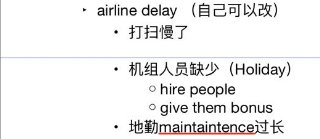
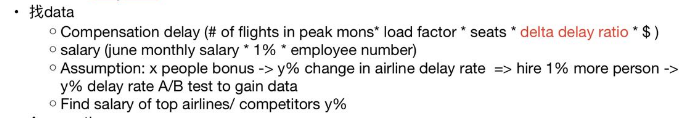
- data source: https://www.transtats.bts.gov/carriers.asp?20=E

### compute avergae late compensation fee per seat
- source: https://www.jetblue.com/magnoliapublic/dam/ui-assets/p/Bill_Of_Rights.pdf

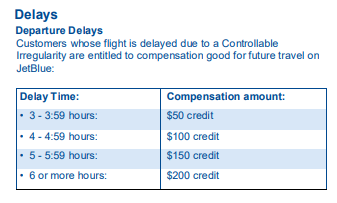
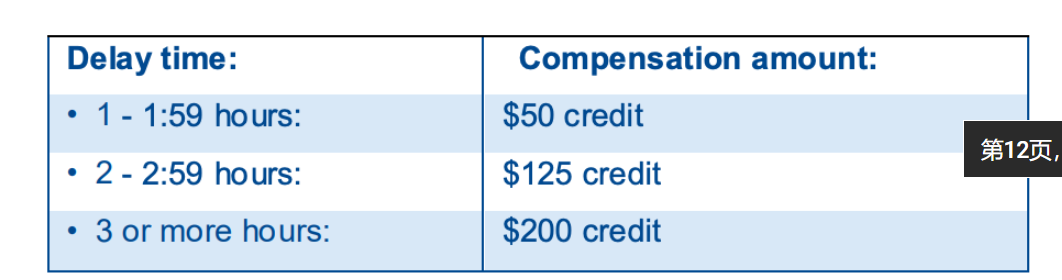

In [ ]:
JetBlue_2017 = flight_traffic_2017[flight_traffic_2017['airline_id'] == 'B6']
Delta_2017 = flight_traffic_2017[flight_traffic_2017['airline_id'] == 'DL']

In [ ]:
JetBlue_2017['airline_delay_flag'] = np.where(JetBlue_2017['airline_delay'] < 180, 0,
                        np.where(JetBlue_2017['airline_delay'] < 240, 1,
                        np.where(JetBlue_2017['airline_delay'] < 300, 2,
                        np.where(JetBlue_2017['airline_delay'] < 360, 3,         
                        4))))

<ipython-input-8-5ce0166397ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JetBlue_2017['airline_delay_flag'] = np.where(JetBlue_2017['airline_delay'] < 180, 0,


In [ ]:
JetBlue_2017['airline_delay_flag'] = np.where(JetBlue_2017['airline_delay'] < 60, 0,
                        np.where(JetBlue_2017['airline_delay'] < 120, 1,
                        np.where(JetBlue_2017['airline_delay'] < 180, 2, 3         
                        )))

<ipython-input-21-801c2660cc90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JetBlue_2017['airline_delay_flag'] = np.where(JetBlue_2017['airline_delay'] < 60, 0,


In [ ]:
JetBlue_2017['airline_delay_flag'].value_counts()

0    29926
1       58
2       31
4       11
3       10
Name: airline_delay_flag, dtype: int64

Text(0.5, 1.0, 'Barplot of delay flights and delay hours of JetBlue')

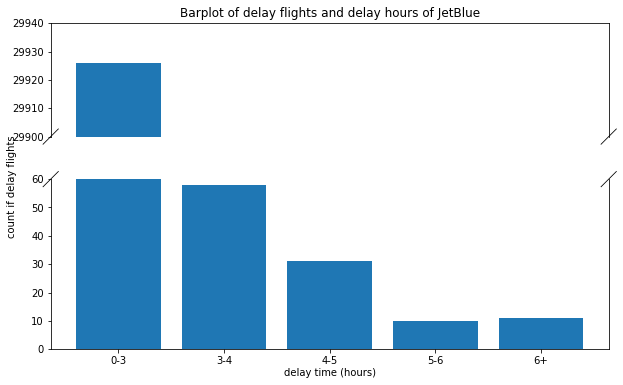

In [ ]:
# df = pd.DataFrame()
# df['flag'] = ['0-3', '3-4', '4-5', '5-6', '6+']
# df['delay count'] = [29926, 58, 31, 10, 11]
# plt.bar(data=df, x='flag', y='delay count')

x = [29926, 58, 31, 10, 11]
fig = plt.figure(figsize=(10,6))
bax = brokenaxes(ylims=((0, 60), (29900, 29940)), hspace=0.3, despine=False)
bax.bar(['0-3', '3-4', '4-5', '5-6', '6+'], x)
bax.set_xlabel('delay time (hours)')
bax.set_ylabel('count if delay flights')
bax.set_title('Barplot of delay flights and delay hours of JetBlue')

In [ ]:
delay_per_year_JetBlue = JetBlue_2017['airline_delay_flag'].value_counts()
compensation_fee_list = np.array([0, 50, 125, 200])
compensation_fee = sum(delay_per_year_JetBlue * compensation_fee_list)
fee_per_person = compensation_fee / sum(delay_per_year_JetBlue)
fee_per_person

2.0908243441203886

### total compensation fee per month

In [ ]:
# delay_rate_decrease = 0.1
Loadfactor_2017 = 0.847
seats_per_airplane = 200
crew_salary_one_percent = 600000
#loss_per_person = 100
loss_per_person = fee_per_person
flight_2017 = sum(delay_per_year_JetBlue)

y = crew_salary_one_percent / (seats_per_airplane * Loadfactor_2017 * loss_per_person * flight_2017/12)
print(y)





0.6767985922589281


In [ ]:
seats_per_airplane * Loadfactor_2017 * loss_per_person * flight_2017/12

886526.6666666666

In [ ]:
seats_per_airplane * Loadfactor_2017 * flight_2017/12

424008.2